In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('./data/loan.csv')

In [5]:
df.shape

(166941, 74)

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [8]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             82374
Current                                                59588
Charged Off                                            19080
Does not meet the credit policy. Status:Fully Paid      1988
Late (31-120 days)                                      1733
In Grace Period                                          931
Does not meet the credit policy. Status:Charged Off      761
Late (16-30 days)                                        307
Default                                                  179
Name: count, dtype: int64

In [9]:
df['target']=np.where(df['loan_status'].isin(
    ['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)

In [10]:
df1=df.drop(labels=['member_id','id','loan_status'],axis=1)

In [11]:
df1['target'].mean()

0.11992260738823896

In [12]:
df1.isnull().mean()

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
total_rev_hi_lim    0.254791
inq_fi              1.000000
total_cu_tl         1.000000
inq_last_12m        1.000000
target              0.000000
Length: 72, dtype: float64

In [13]:
(df1.isnull().mean()<=0.25).value_counts()

True     47
False    25
Name: count, dtype: int64

In [14]:
df1=df1.loc[:, df1.isnull().mean()<=0.25]

In [15]:
df1.shape

(166941, 47)

In [16]:
X = df1.drop(labels=['target'],axis=1)
Y = df1[['target']]

In [17]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0


In [18]:
Y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [19]:
categorical_col = pd.DataFrame(X.select_dtypes(include="object"))
numerical_col = pd.DataFrame(X.select_dtypes(exclude="object"))

In [20]:
numerical_col.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000024
dti                           0.000000
delinq_2yrs                   0.000174
inq_last_6mths                0.000174
open_acc                      0.000174
pub_rec                       0.000174
revol_bal                     0.000000
revol_util                    0.000994
total_acc                     0.000174
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000869
policy_code              

In [21]:
categorical_col.isnull().mean()

term                   0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              0.063364
emp_length             0.040194
home_ownership         0.000000
verification_status    0.000000
issue_d                0.000000
pymnt_plan             0.000000
url                    0.000000
purpose                0.000000
title                  0.000114
zip_code               0.000000
addr_state             0.000000
earliest_cr_line       0.000174
initial_list_status    0.000000
last_pymnt_d           0.001000
last_credit_pull_d     0.000090
application_type       0.000000
dtype: float64

In [22]:
#Handeling missing value for numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num1 = pd.DataFrame(imputer.fit_transform(numerical_col), index=numerical_col.index, columns=numerical_col.columns)

In [23]:
num1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq
0,5000.0,5000.0,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,1.0,0.0
1,2500.0,2500.0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,1.0,0.0
2,2400.0,2400.0,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,1.0,0.0
3,10000.0,10000.0,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,1.0,0.0
4,3000.0,3000.0,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,1.0,0.0


In [24]:
num1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
dtype: float64

In [25]:
#Handeling missing value for categorical columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cat1 = pd.DataFrame(imputer.fit_transform(categorical_col), index=categorical_col.index, columns=categorical_col.columns)

In [26]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors

cat1=cat1.drop(['url','zip_code','issue_d','addr_state','sub_grade','last_credit_pull_d','earliest_cr_line','emp_title','title','last_pymnt_d'],axis=1)

In [27]:
cat1['application_type'].value_counts()

application_type
INDIVIDUAL    166941
Name: count, dtype: int64

<Axes: xlabel='term', ylabel='count'>

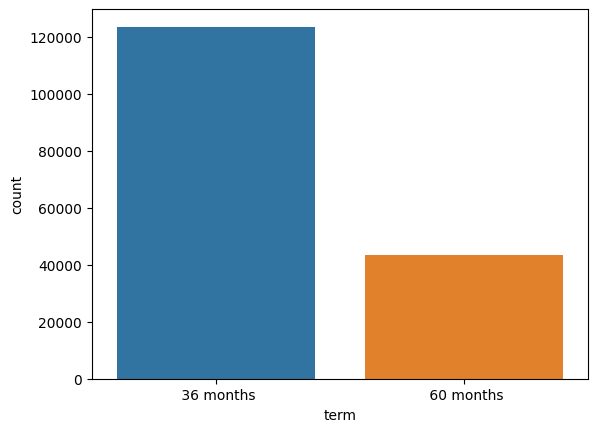

In [28]:
sns.countplot(x=cat1["term"])

In [29]:
cat1.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

<Axes: xlabel='grade', ylabel='count'>

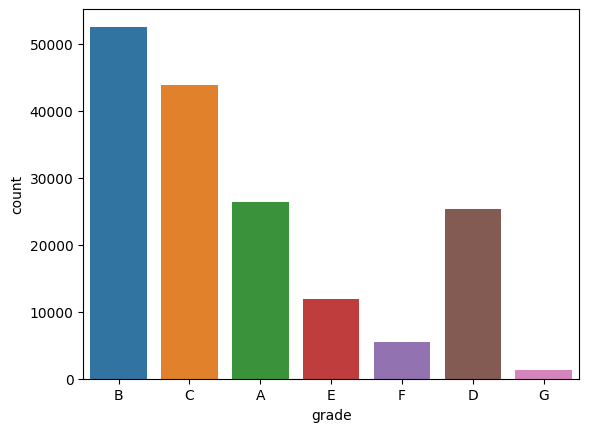

In [30]:
sns.countplot(x=cat1["grade"])

<Axes: xlabel='emp_length', ylabel='count'>

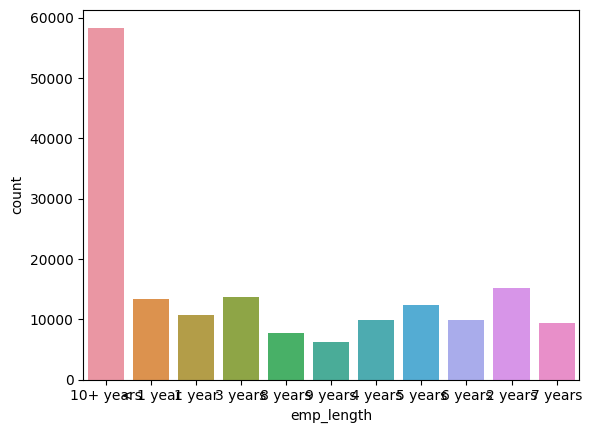

In [31]:
sns.countplot(x=cat1["emp_length"])

<Axes: xlabel='home_ownership', ylabel='count'>

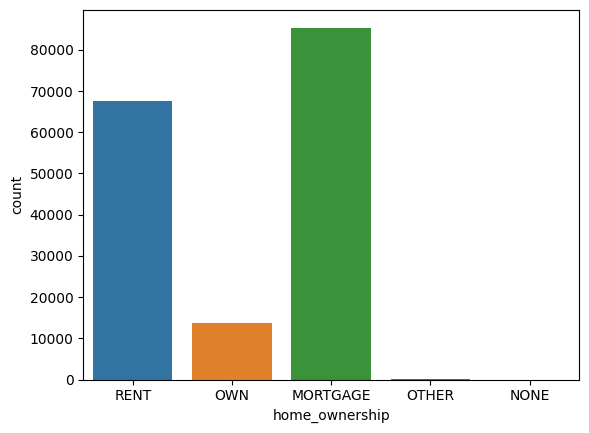

In [32]:
sns.countplot(x=cat1["home_ownership"])

<Axes: xlabel='verification_status', ylabel='count'>

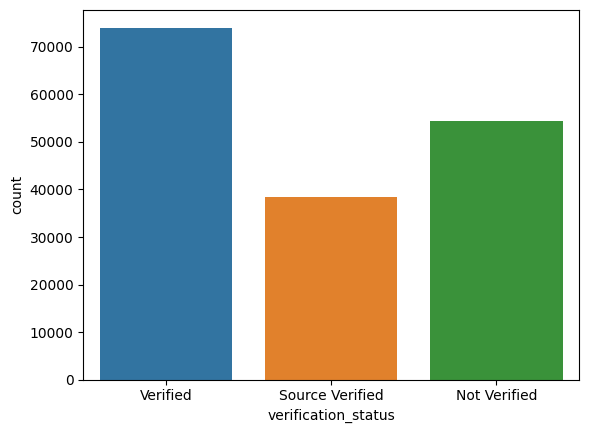

In [33]:
sns.countplot(x=cat1["verification_status"])

<Axes: xlabel='pymnt_plan', ylabel='count'>

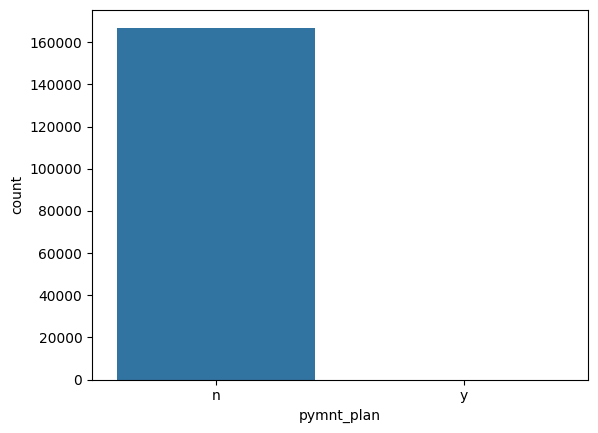

In [34]:
sns.countplot(x=cat1["pymnt_plan"])

<Axes: xlabel='purpose', ylabel='count'>

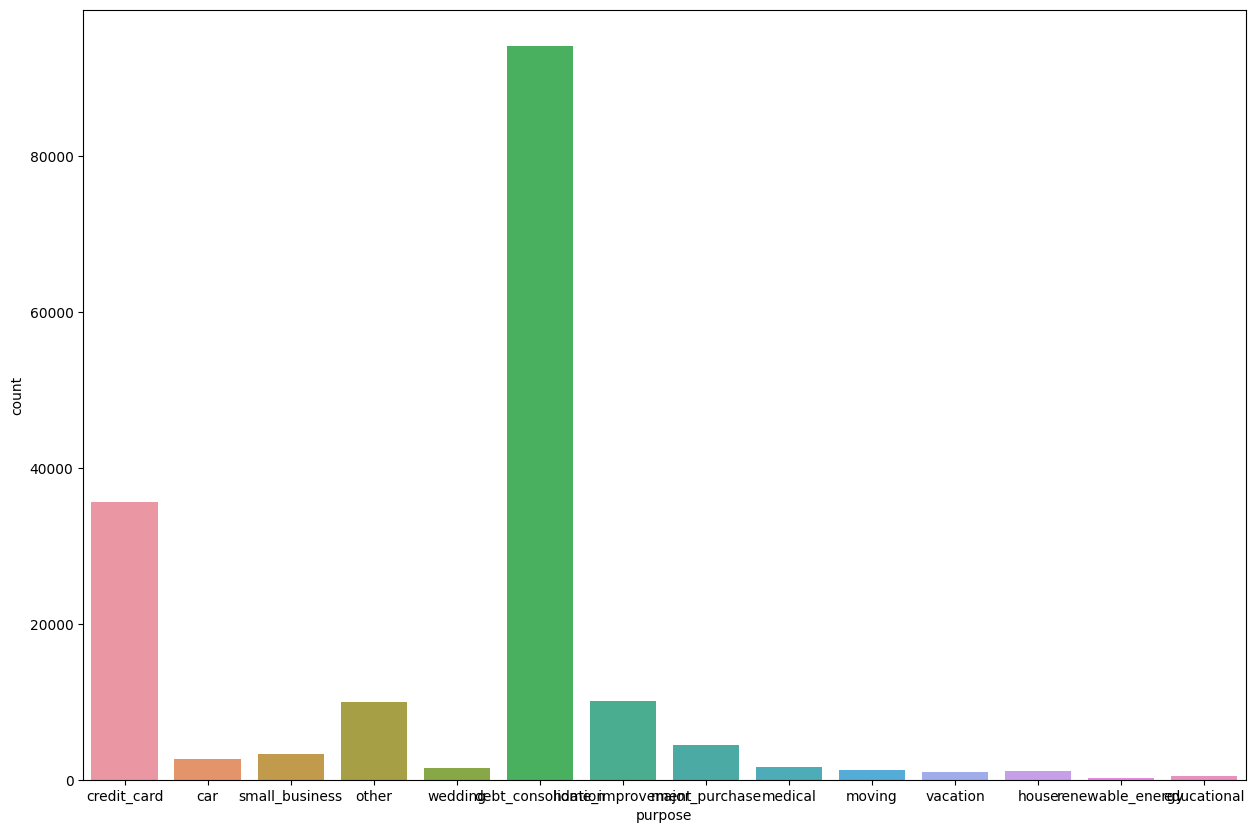

In [35]:
plt.figure(figsize=[15,10])
sns.countplot(x=cat1["purpose"])

<Axes: xlabel='initial_list_status', ylabel='count'>

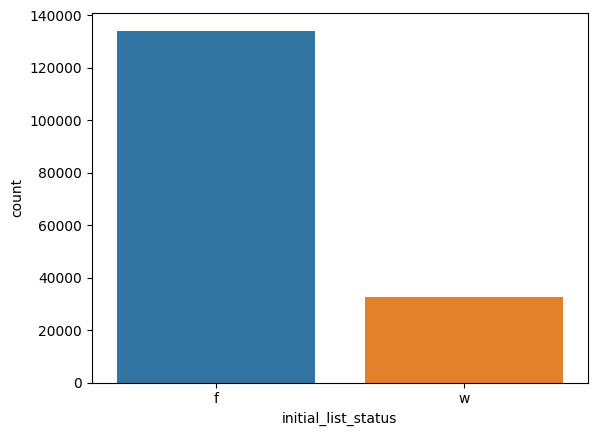

In [36]:
sns.countplot(x=cat1["initial_list_status"])

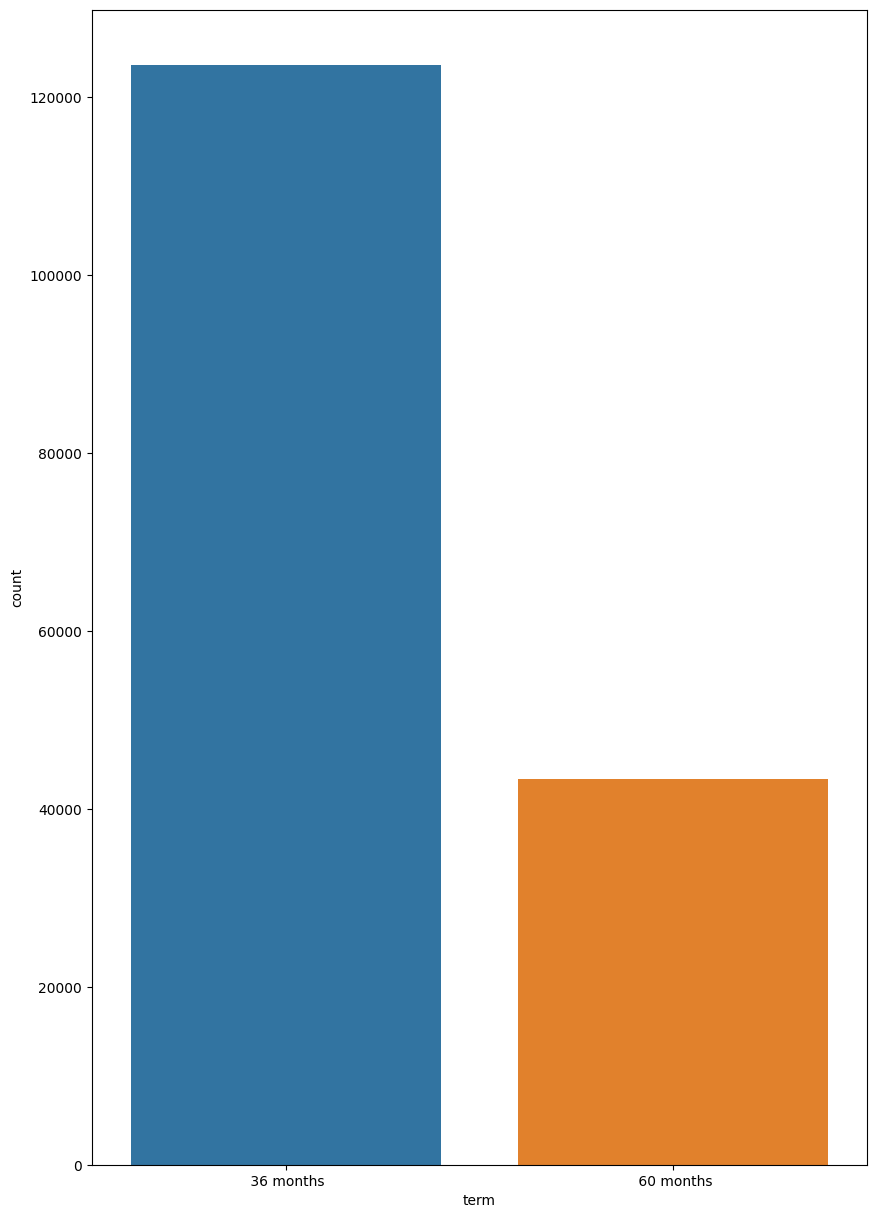

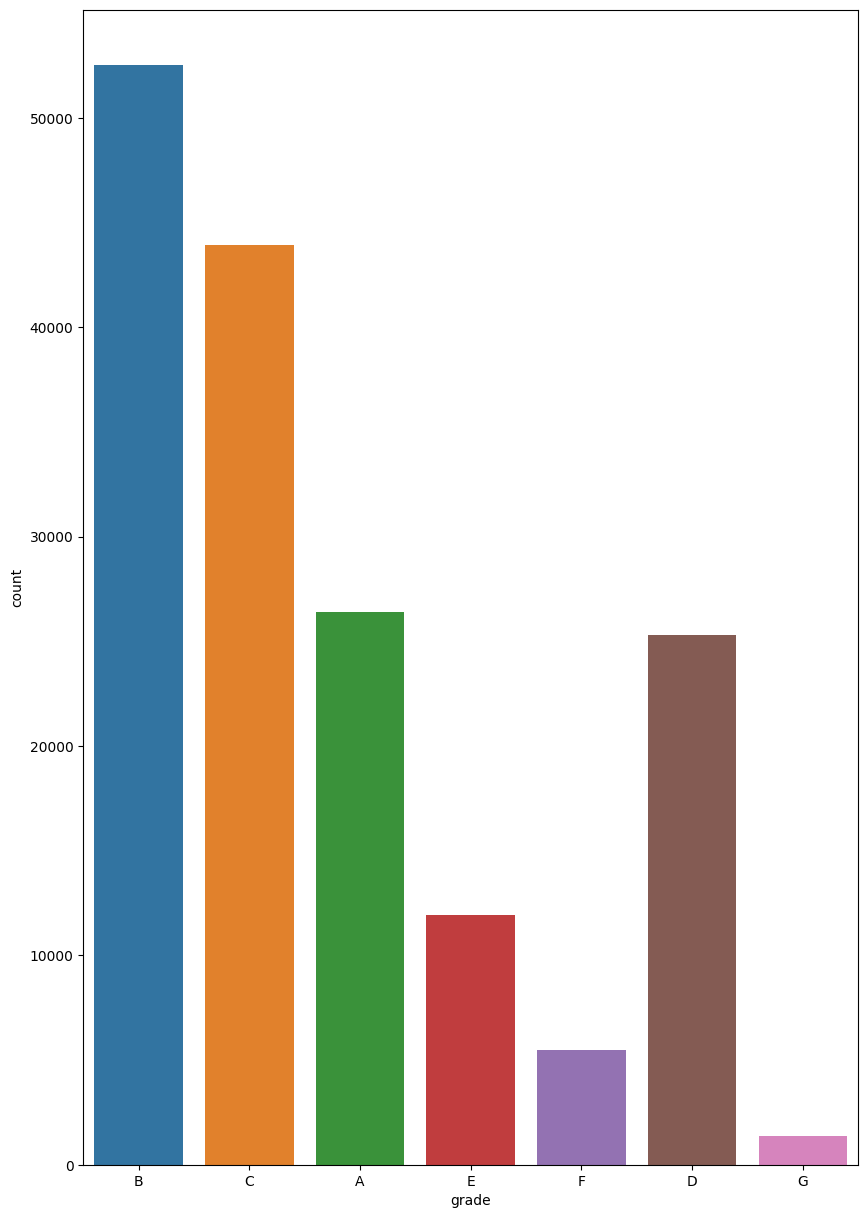

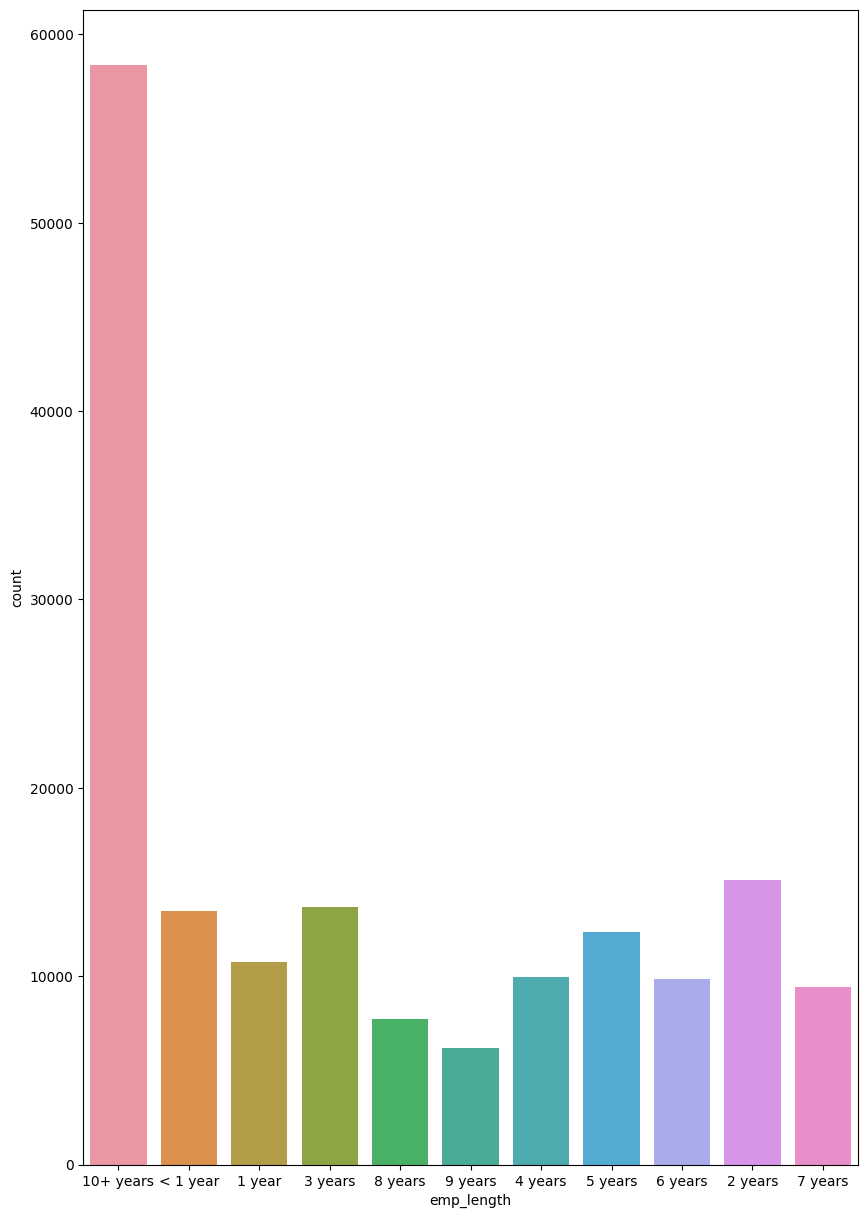

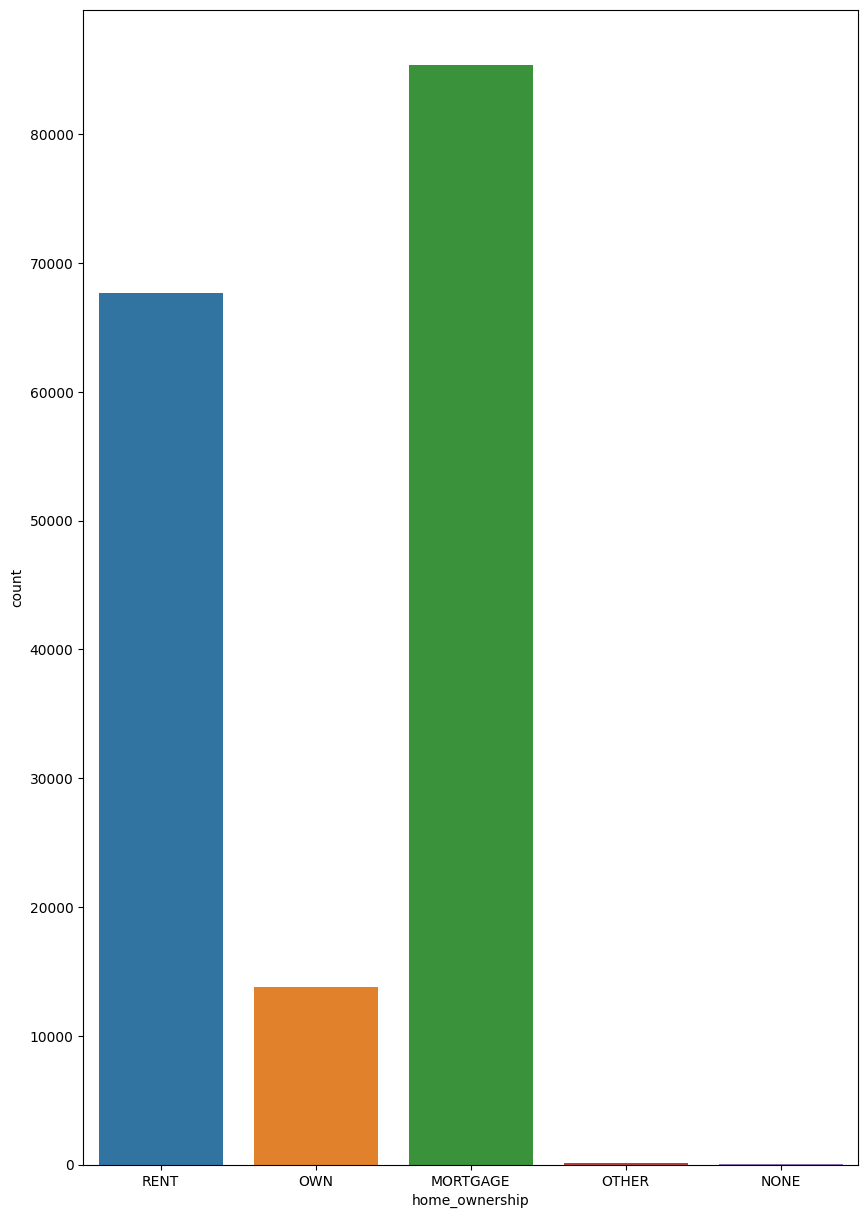

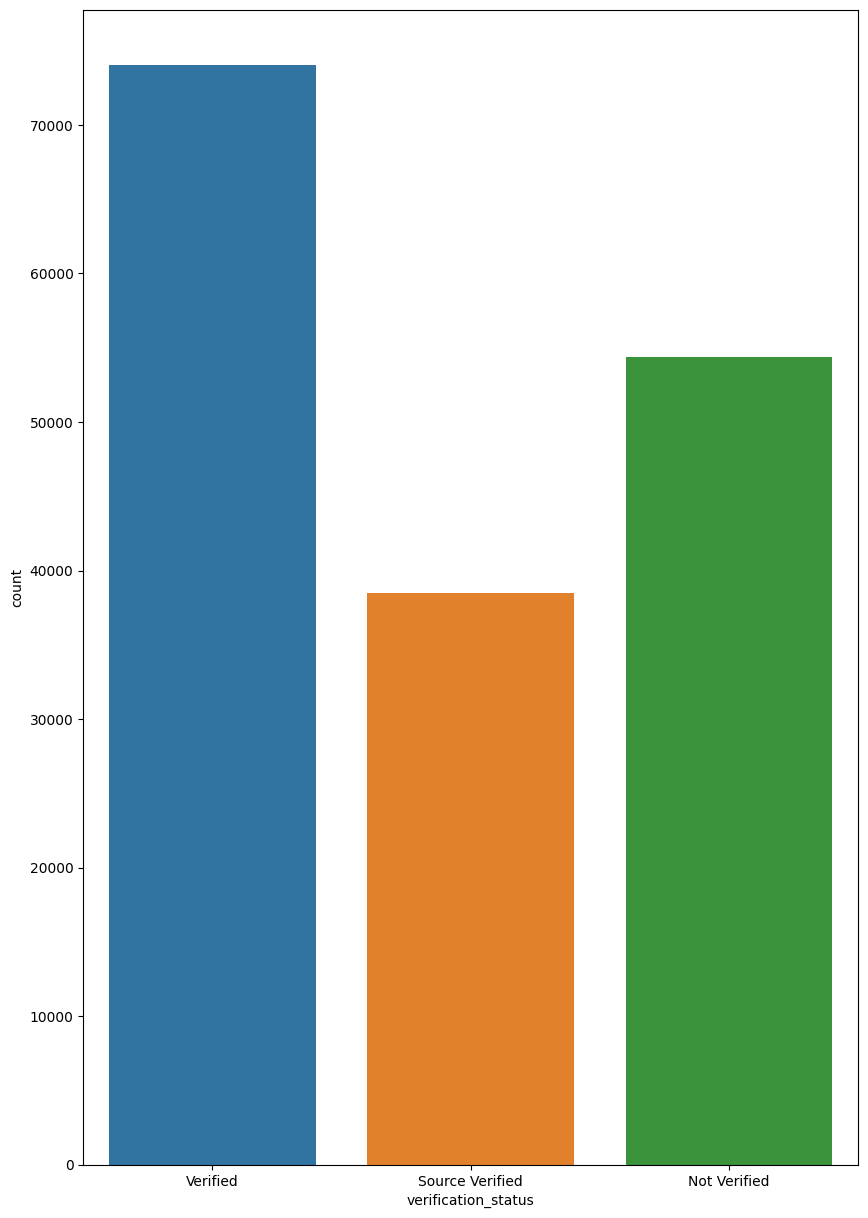

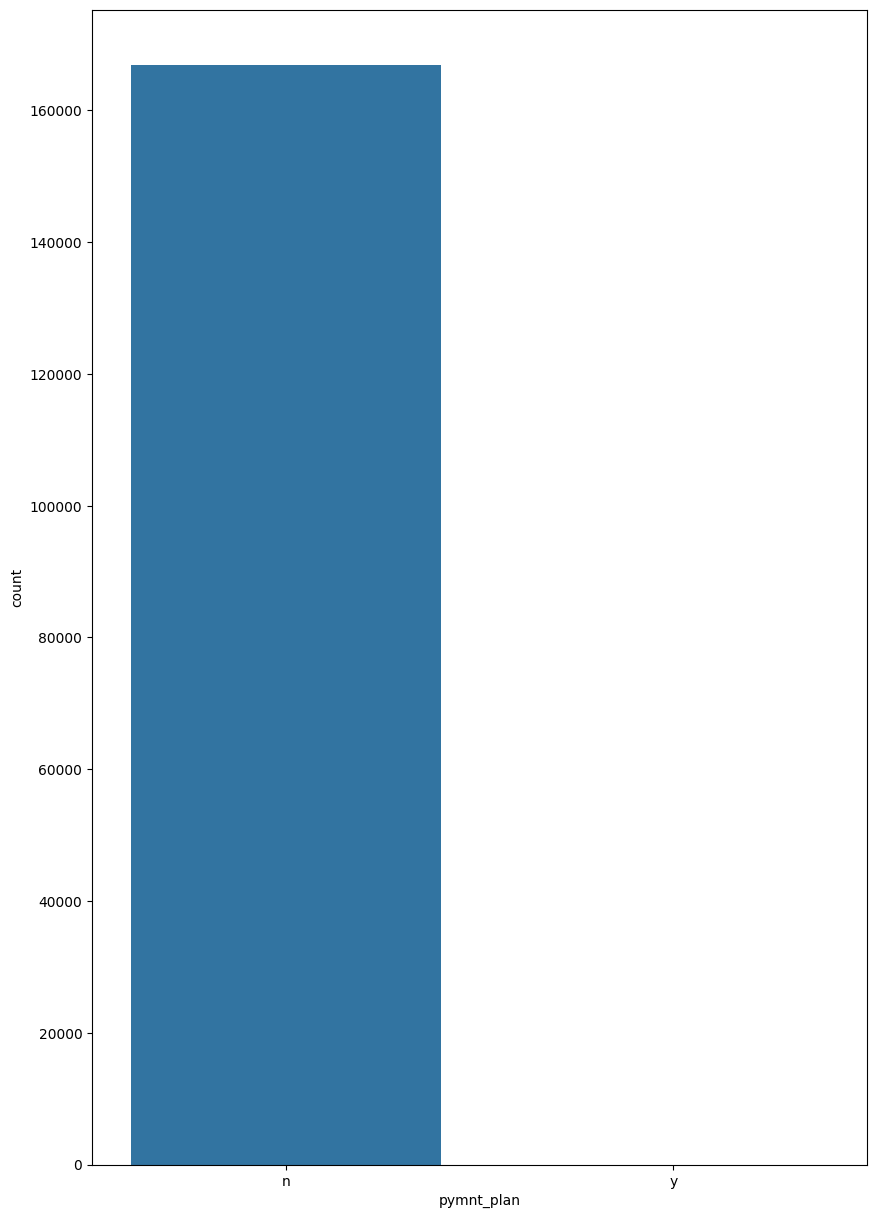

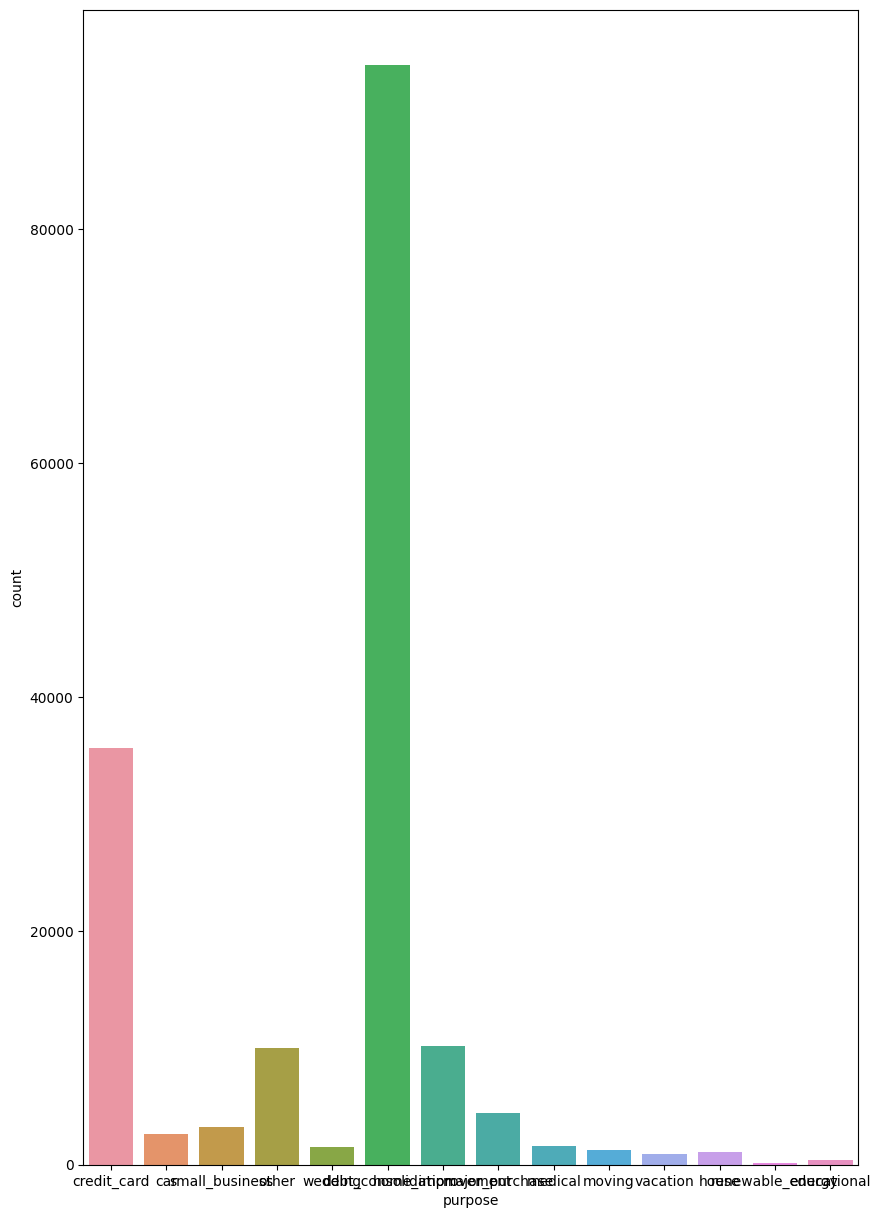

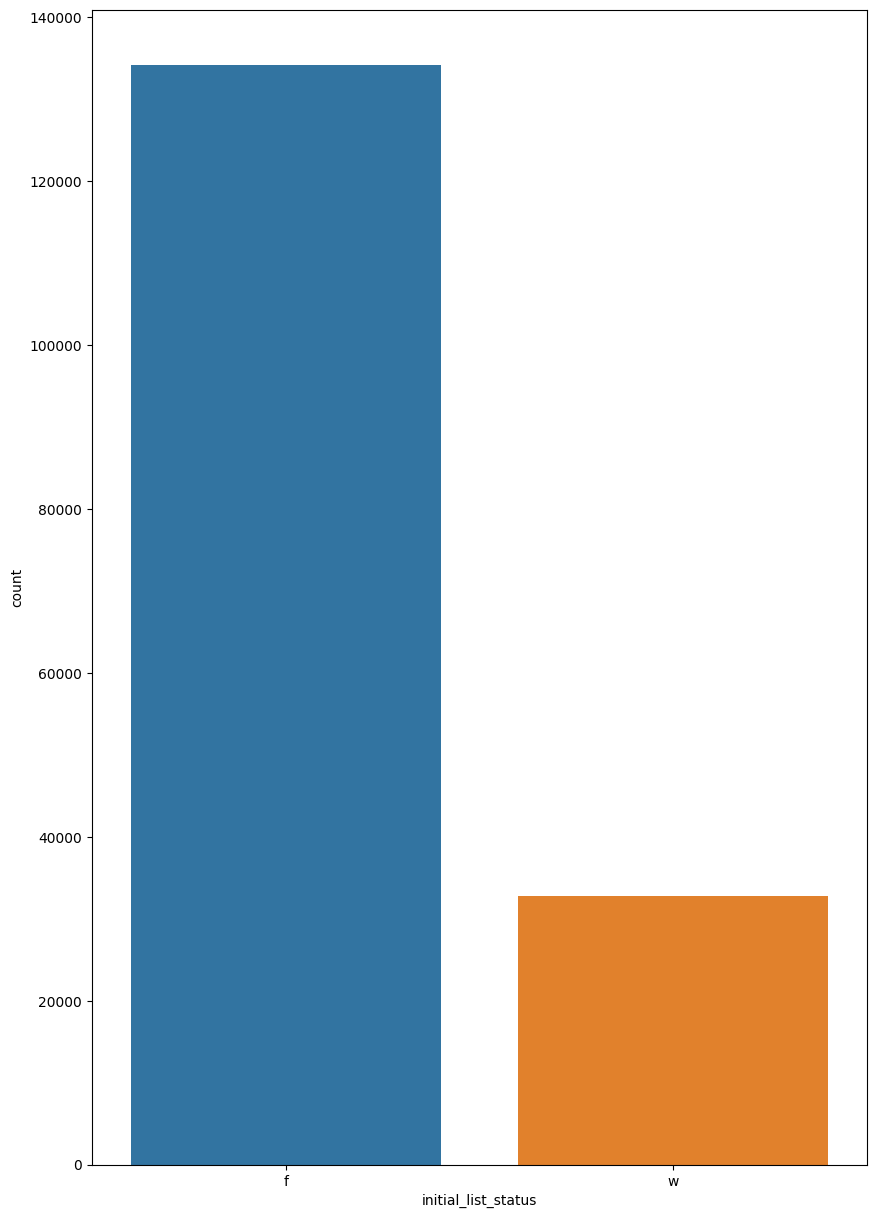

In [50]:
x=1
for i in cat1:
    plt.figure(figsize=[10,15])
    sns.countplot(data=cat1, x=i)
    print('\n')
    plt.show()    

In [51]:
# Joining back the target  variable and exporting the pivot table for a BiVariate Analysis

# categorical_variable_chk=pd.concat([Y,cat1],axis=1,join='inner')
#categorical_variable_chk.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/categorical_data_chk.csv')

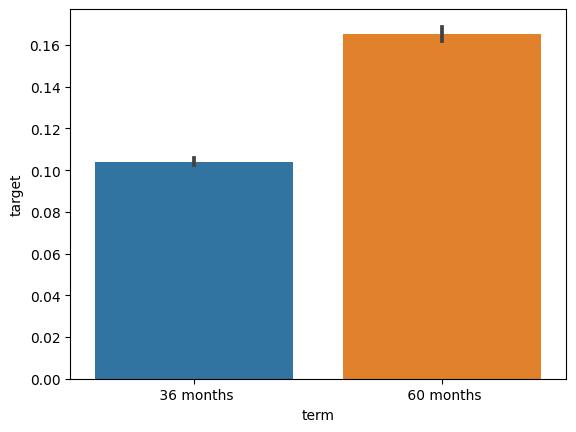

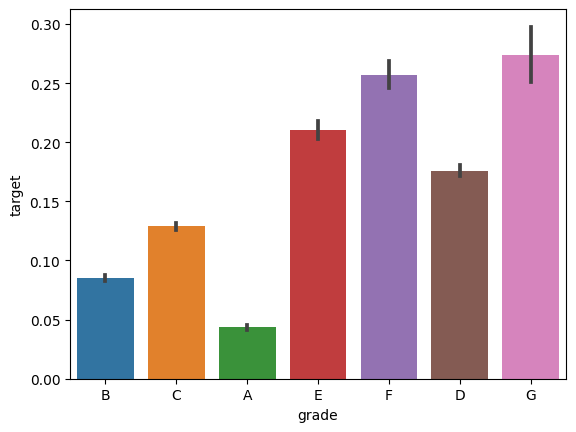

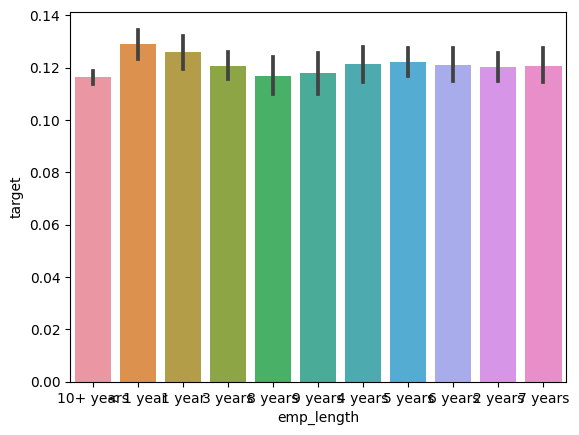

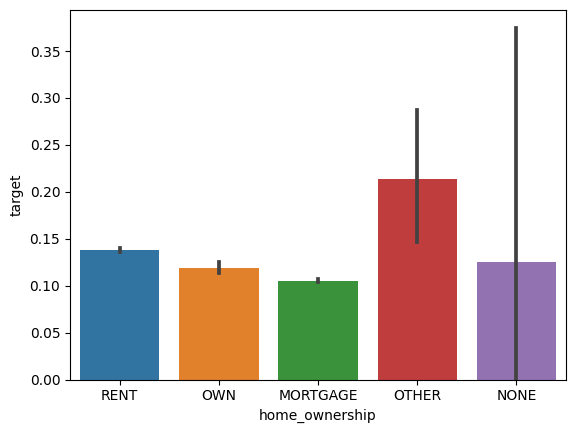

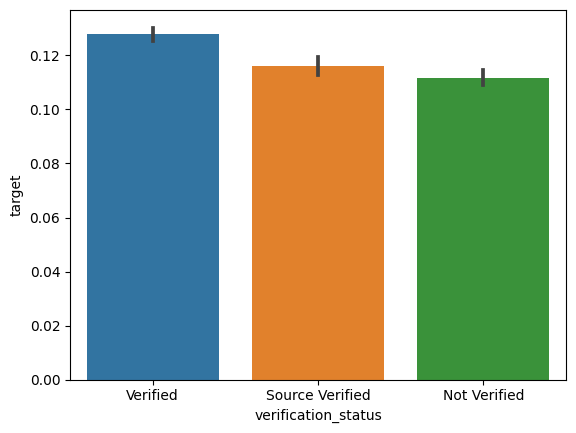

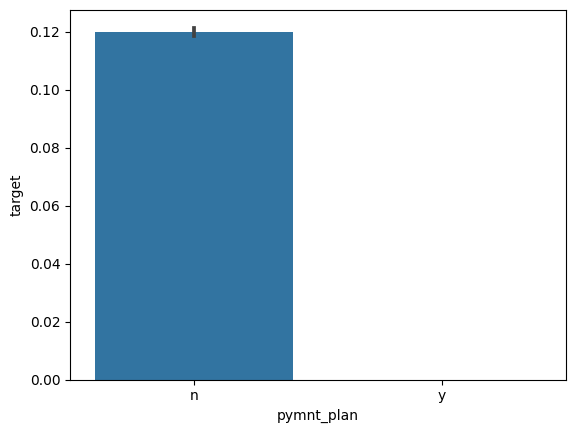

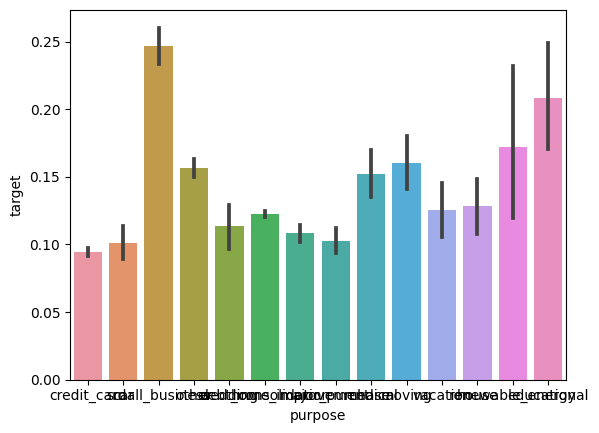

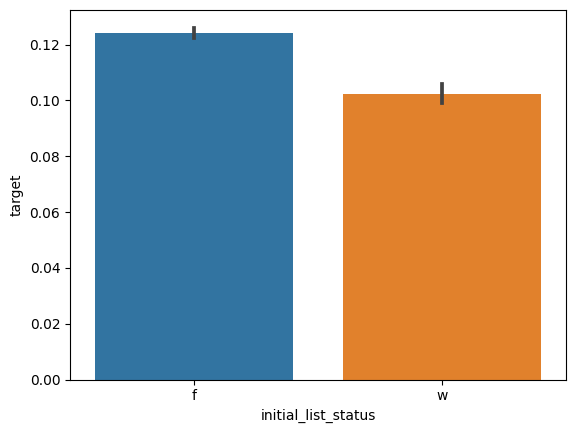

In [52]:
x=1
for i in cat1:
    # plt.figure(figsize=[10,15])
    sns.barplot(data=cat1, x=i, y=Y["target"])
    print('\n')
    plt.show()    

In [46]:
cat1["application_type"].value_counts()

application_type
INDIVIDUAL    166941
Name: count, dtype: int64

In [49]:
cat1=cat1.drop(labels=["application_type"], axis=1)

In [55]:
num1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq'],
      dtype='object')

<Axes: xlabel='loan_amnt', ylabel='Density'>

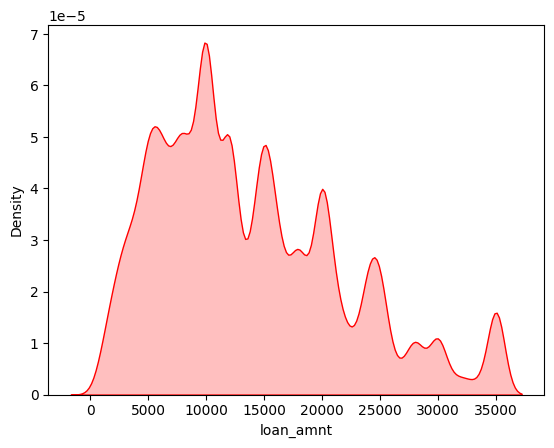

In [57]:
sns.kdeplot(x=num1["loan_amnt"], shade=True, color='r')

/n


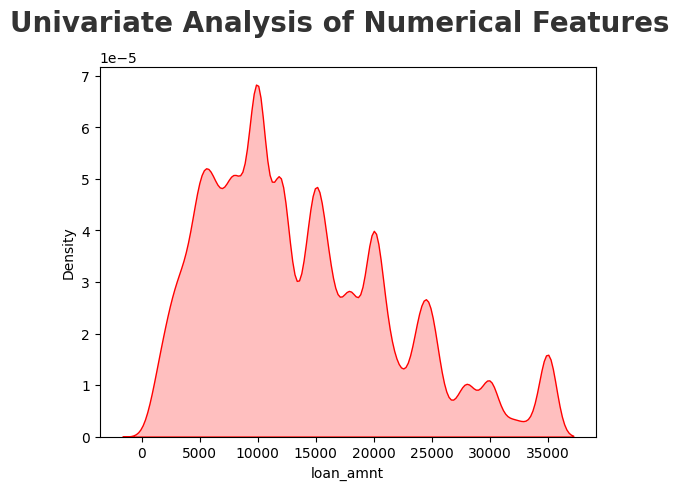

/n


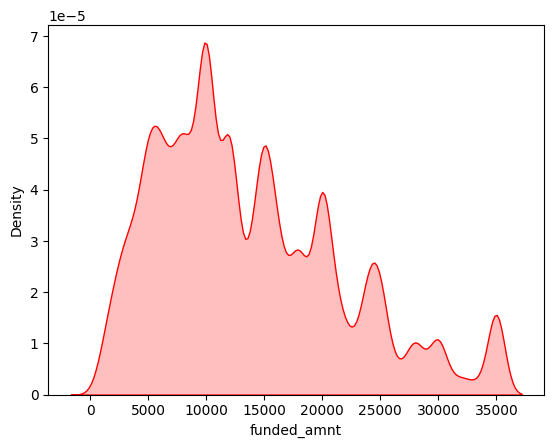

/n


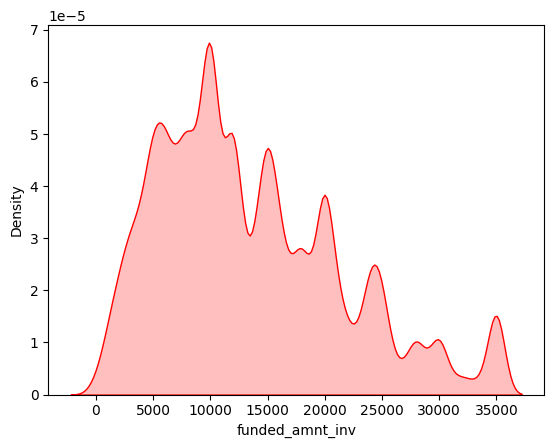

/n


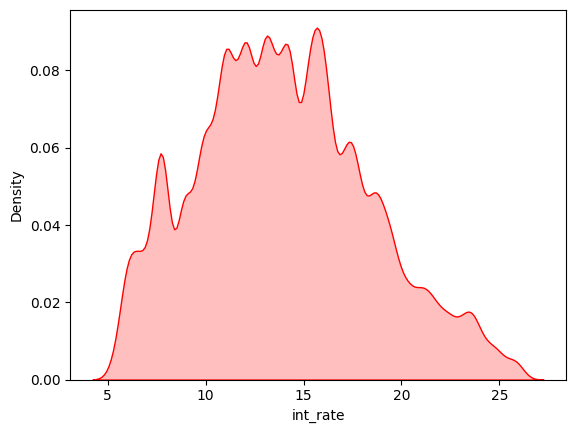

/n


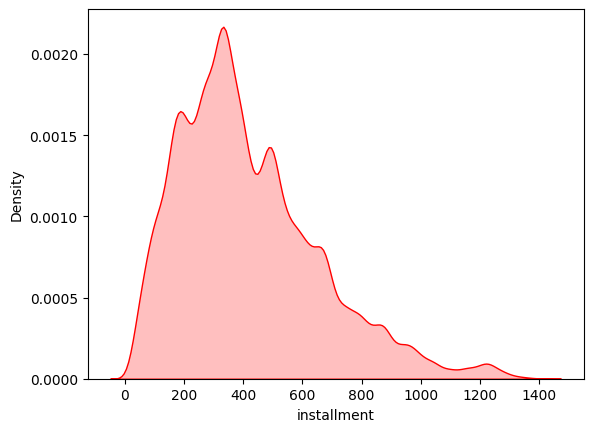

/n


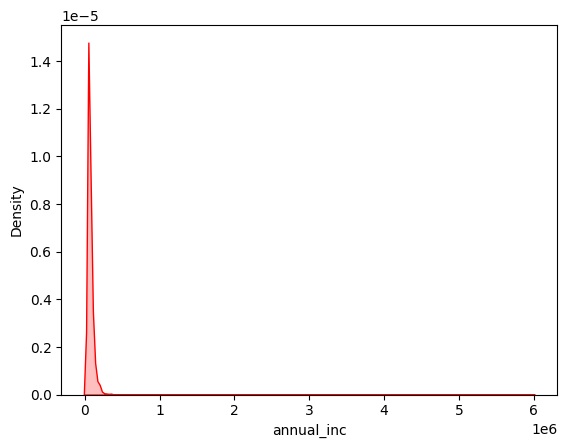

/n


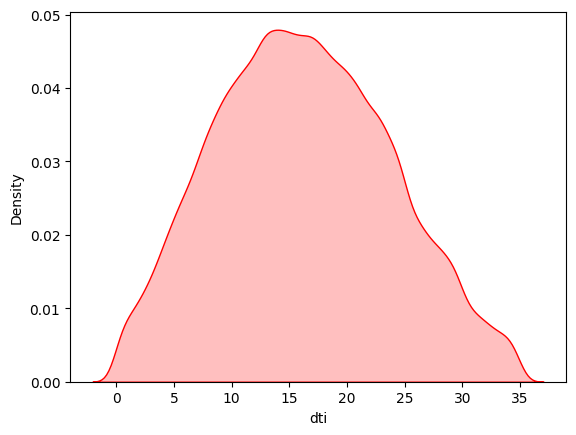

/n


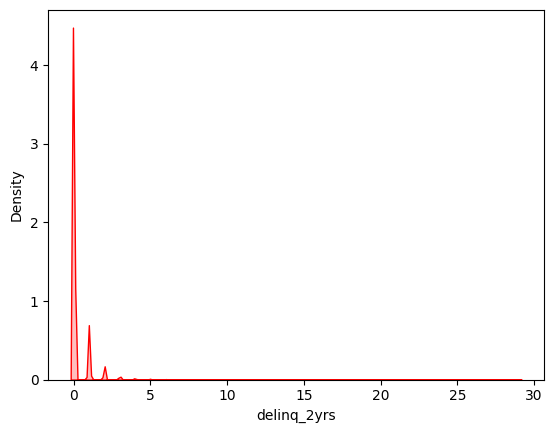

/n


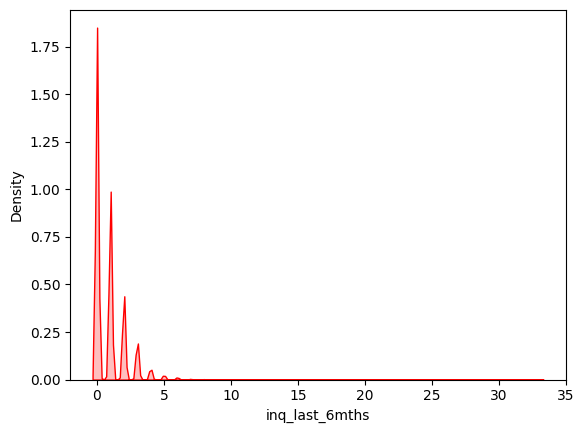

/n


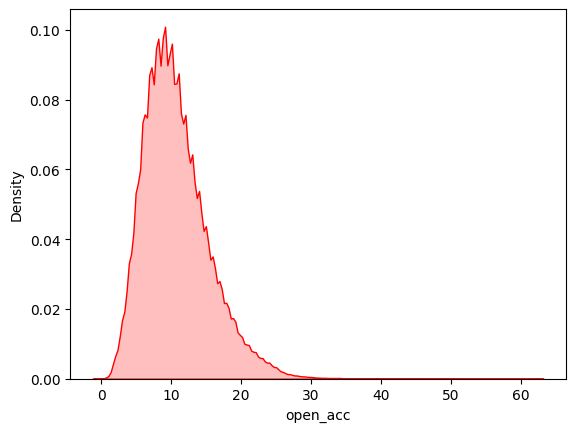

/n


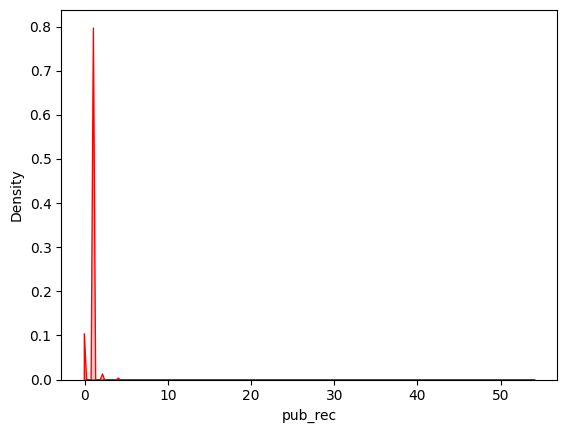

/n


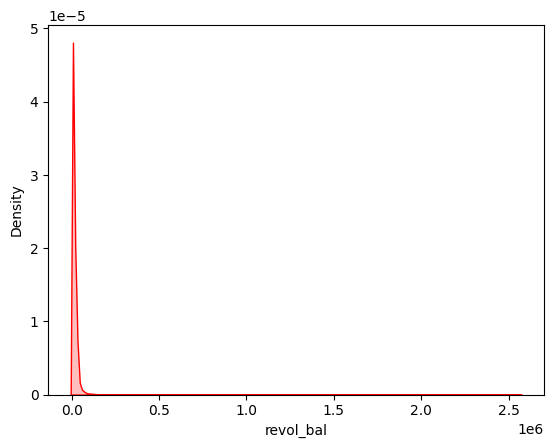

/n


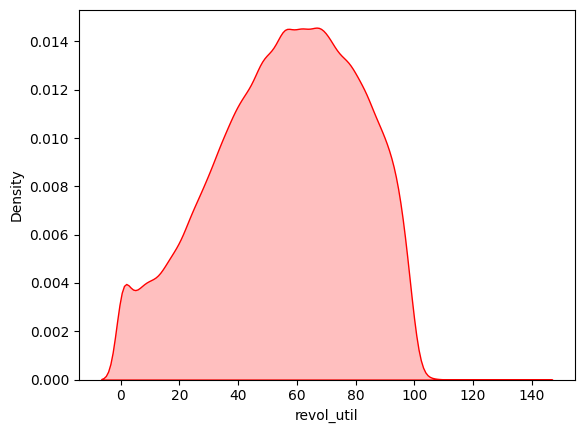

/n


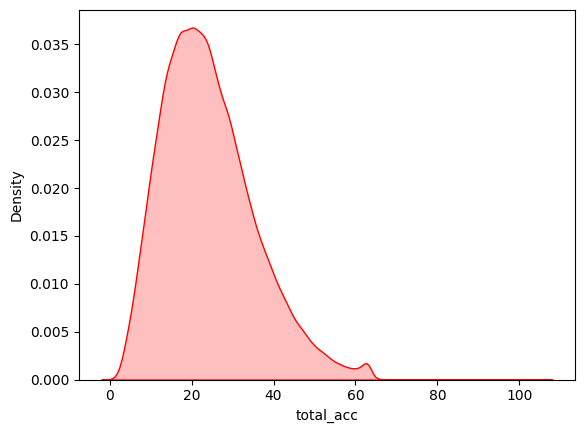

/n


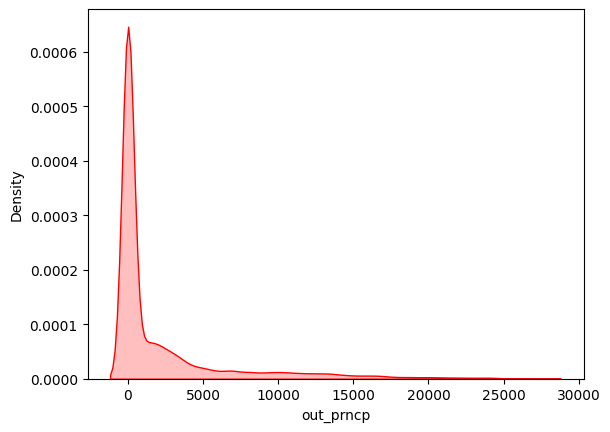

/n


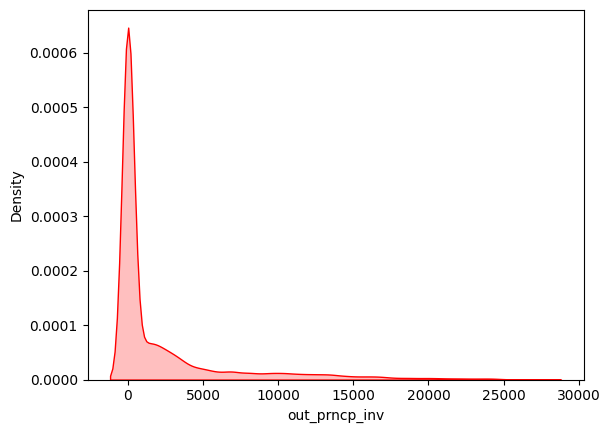

/n


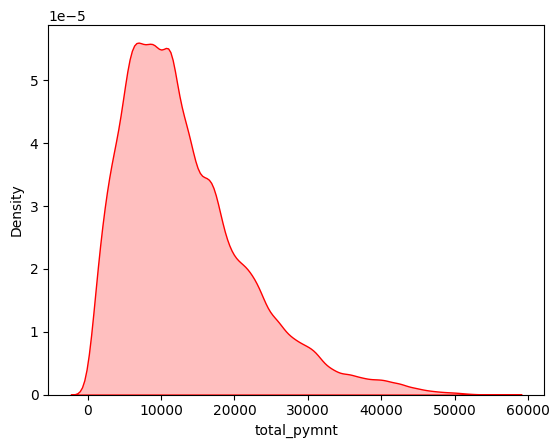

/n


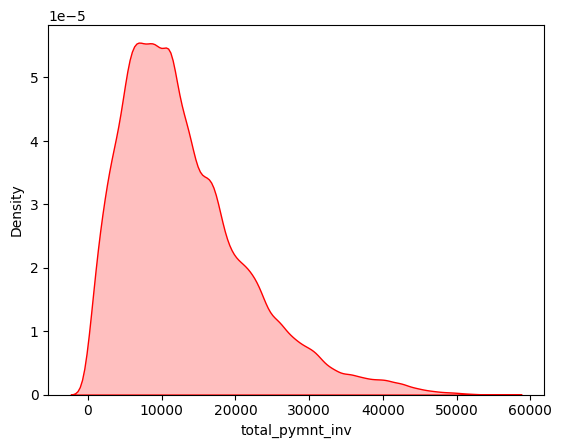

/n


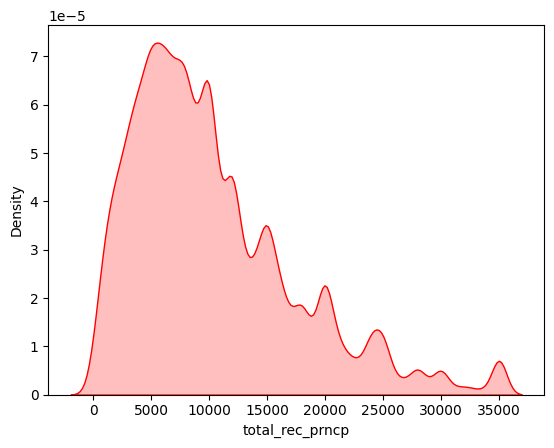

/n


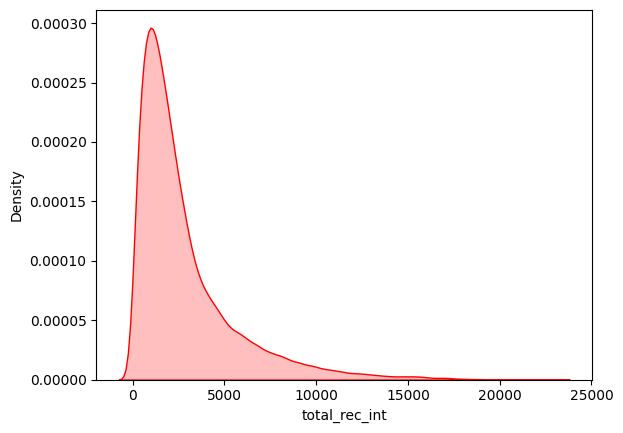

/n


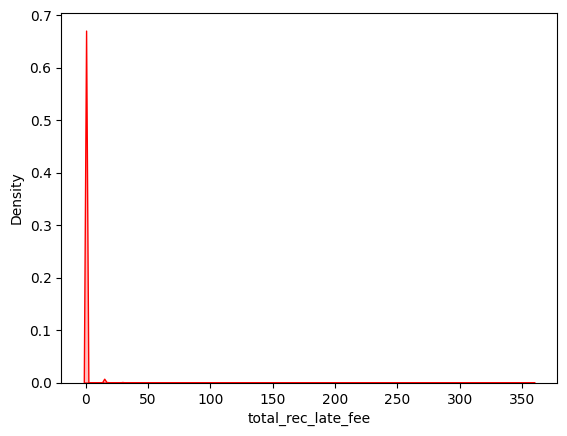

/n


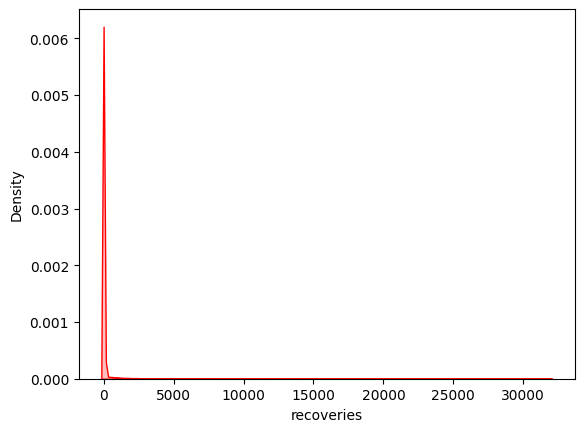

/n


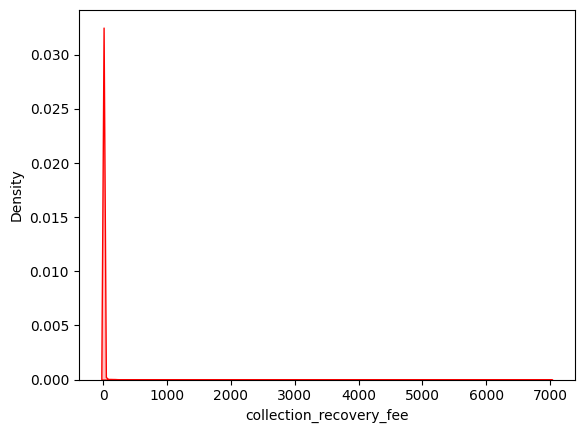

/n


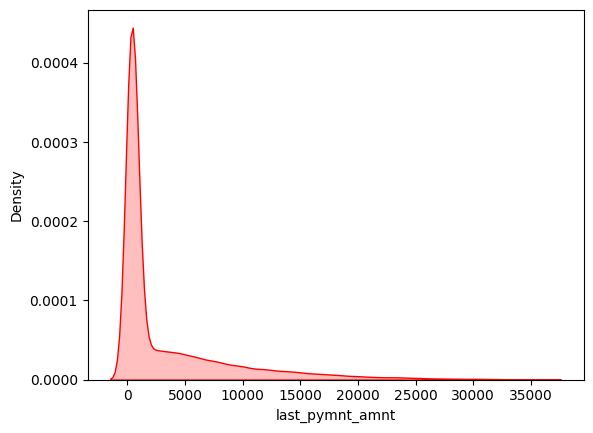

/n


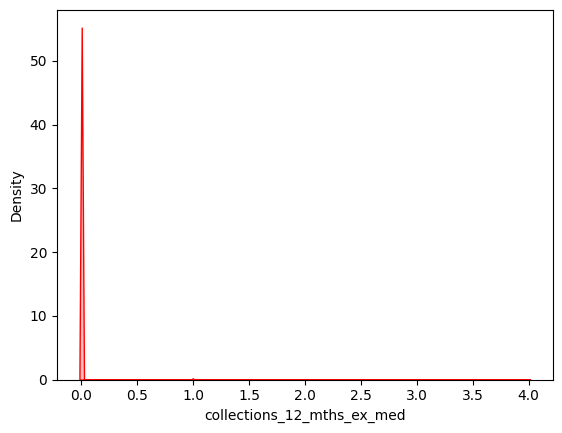

/n


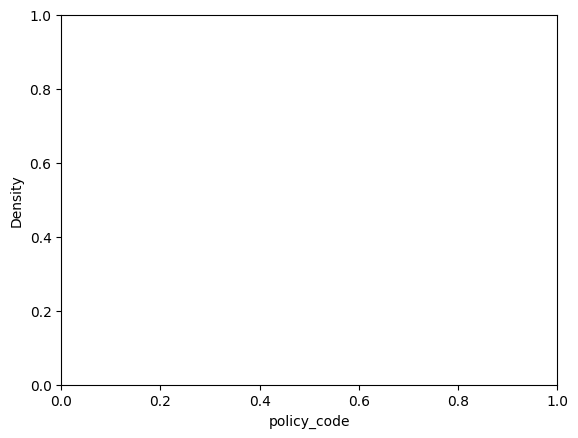

/n


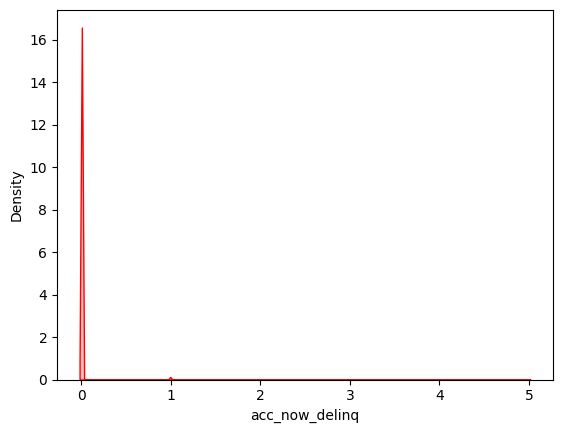

In [62]:
# univeriate analysis of Numerical features

# plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in num1:
    sns.kdeplot(x=num1[i], shade=True, color='r')
    print('/n')
    plt.show()

In [63]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index, columns=num1.columns).add_suffix('_Rank')
num_binned.head()

,loan_amnt_Rank,funded_amnt_Rank,funded_amnt_inv_Rank,int_rate_Rank,installment_Rank,annual_inc_Rank,dti_Rank,delinq_2yrs_Rank,inq_last_6mths_Rank,open_acc_Rank,...,total_pymnt_inv_Rank,total_rec_prncp_Rank,total_rec_int_Rank,total_rec_late_fee_Rank,recoveries_Rank,collection_recovery_fee_Rank,last_pymnt_amnt_Rank,collections_12_mths_ex_med_Rank,policy_code_Rank,acc_now_delinq_Rank
0,1.0,1.0,1.0,2.0,1.0,0.0,9.0,0.0,1.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
3,4.0,4.0,4.0,4.0,4.0,3.0,6.0,0.0,1.0,5.0,...,5.0,6.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,4.0,0.0,7.0,5.0,0.0,0.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


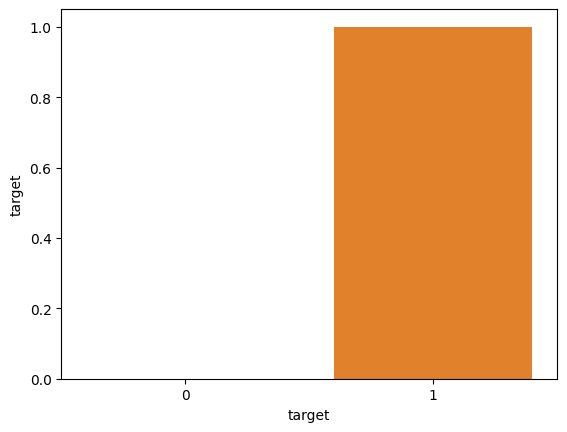

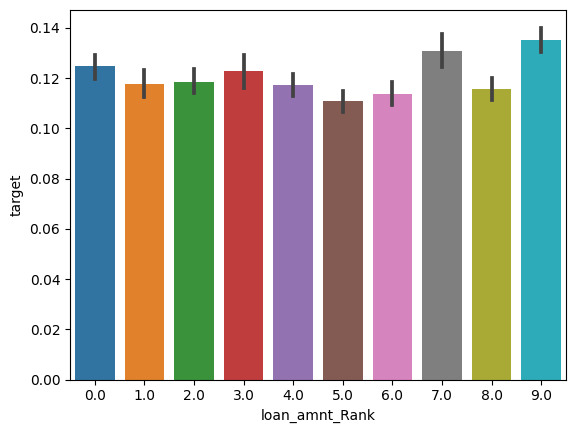

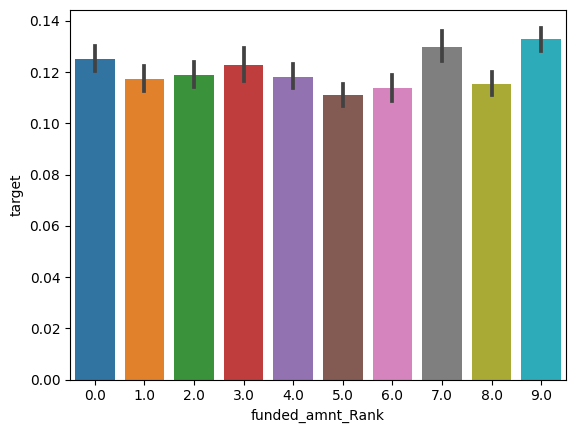

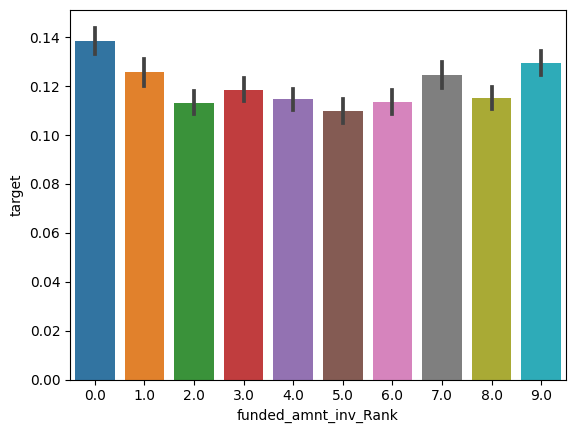

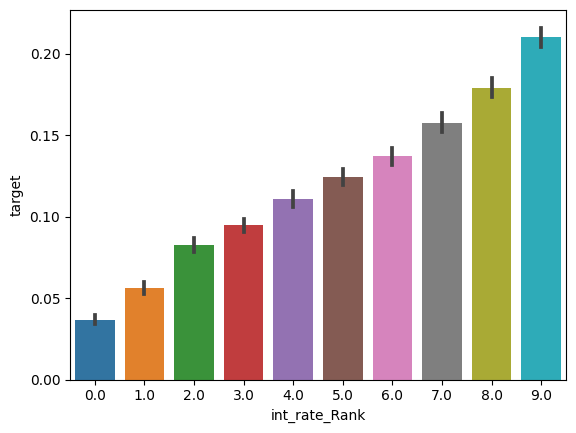

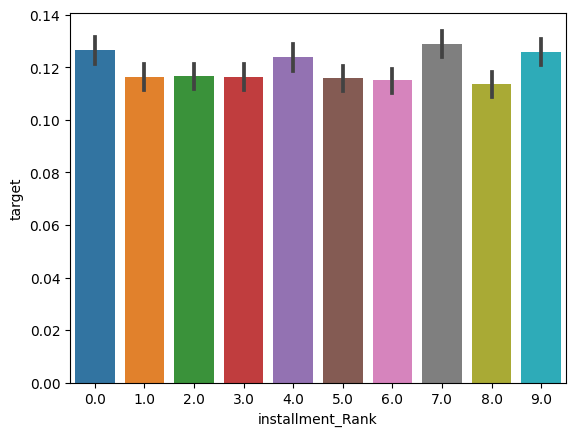

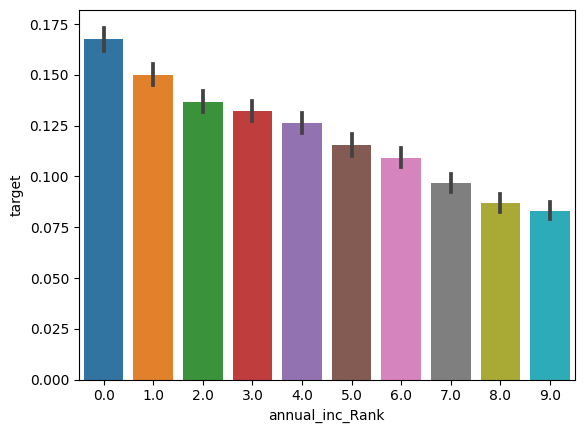

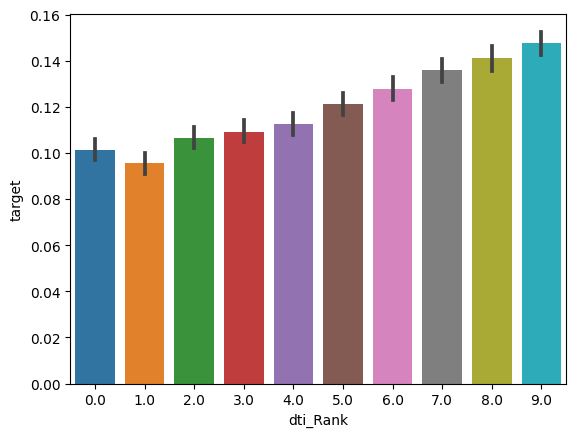

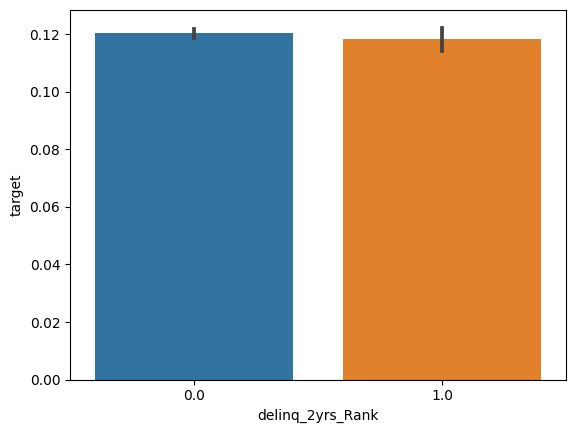

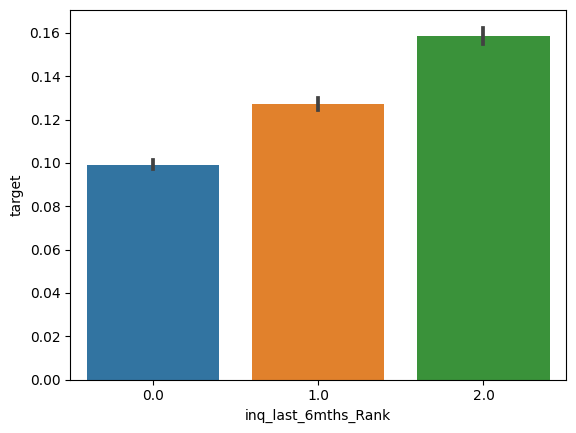

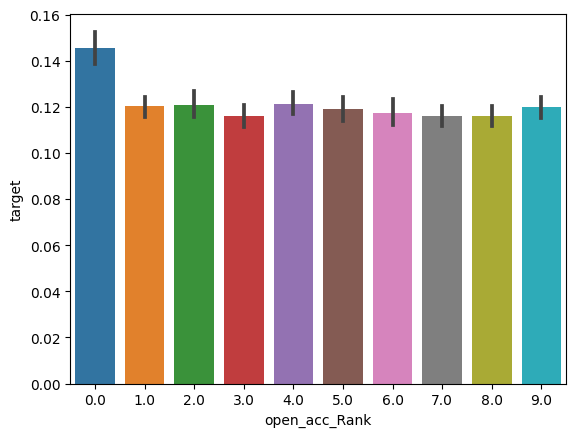

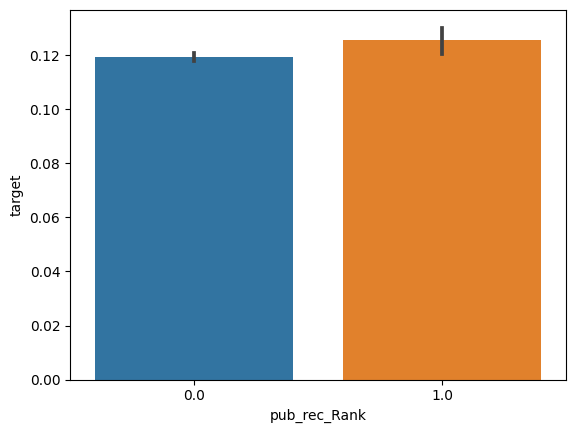

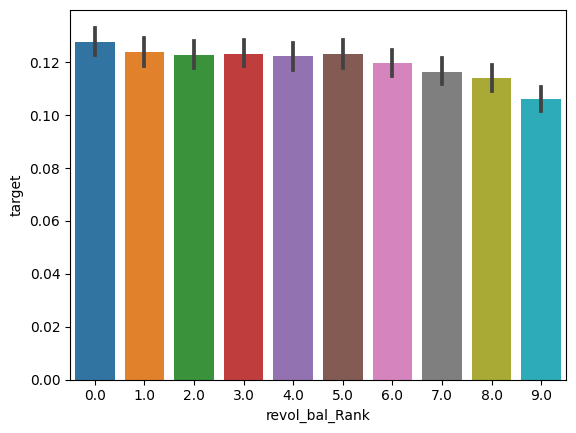

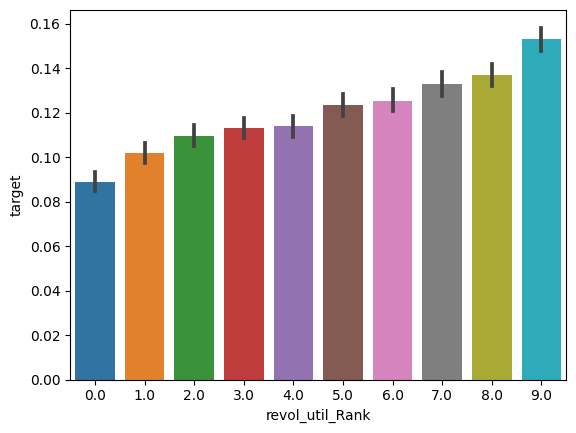

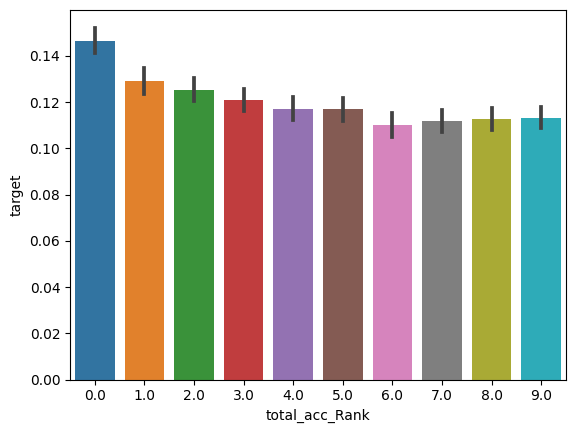

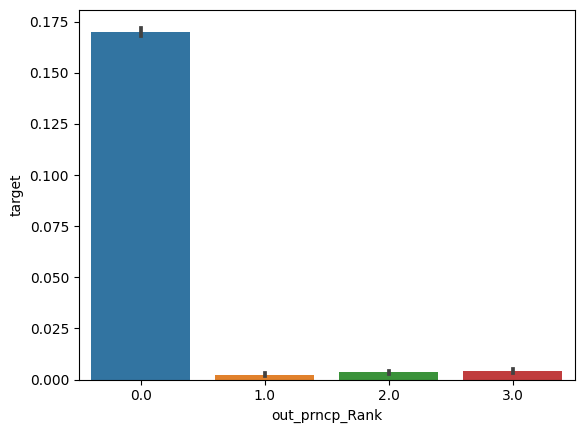

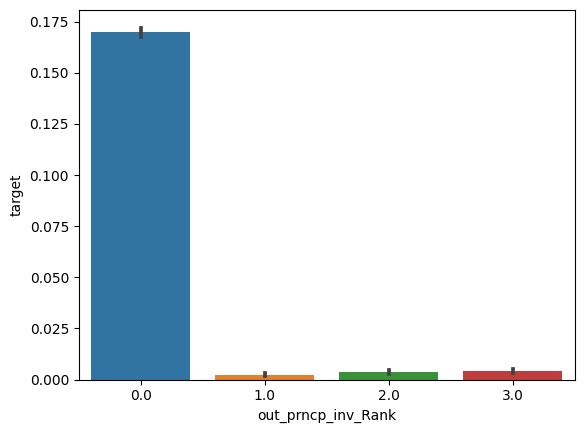

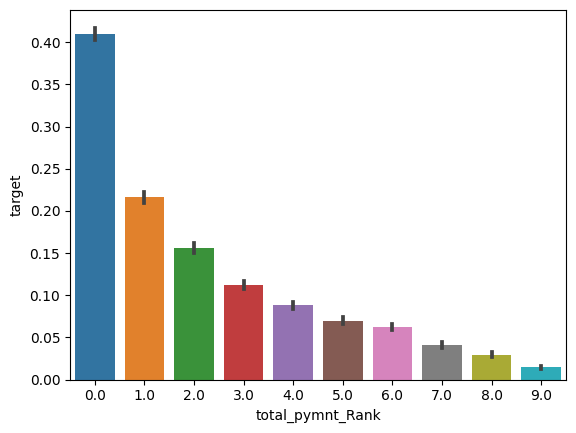

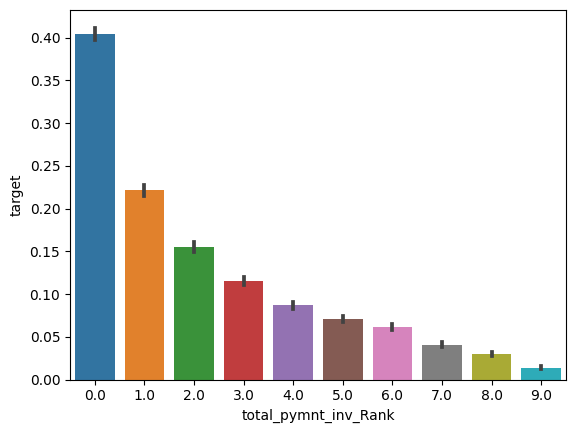

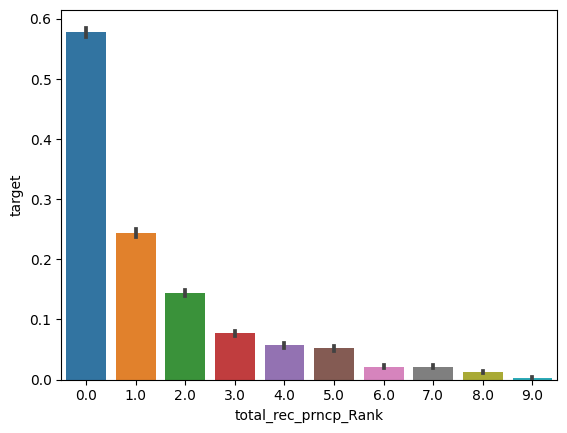

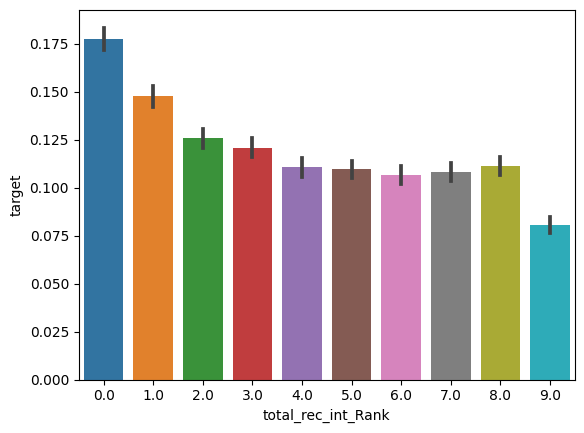

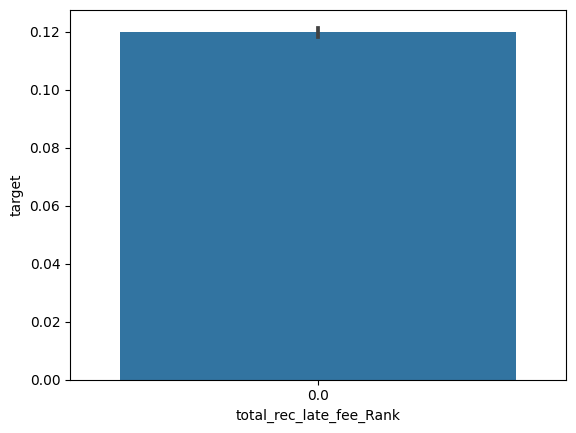

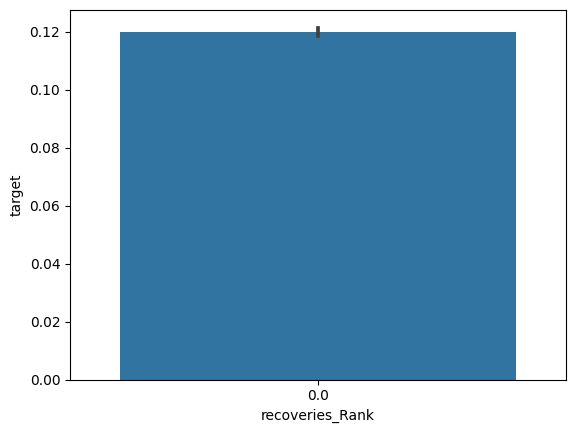

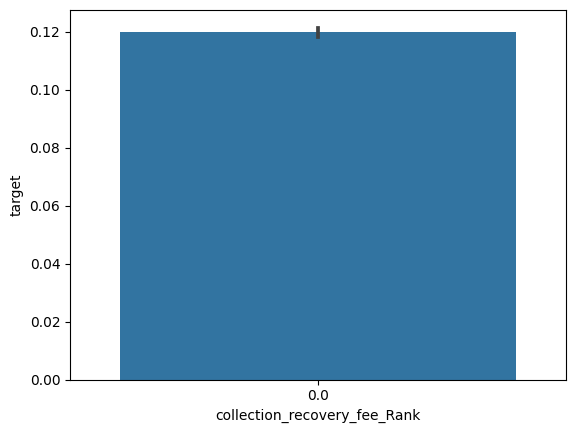

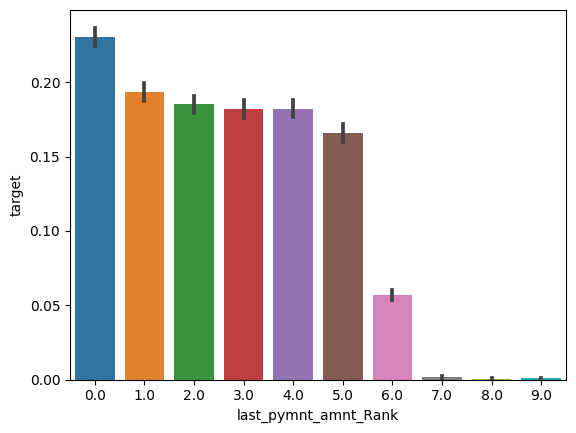

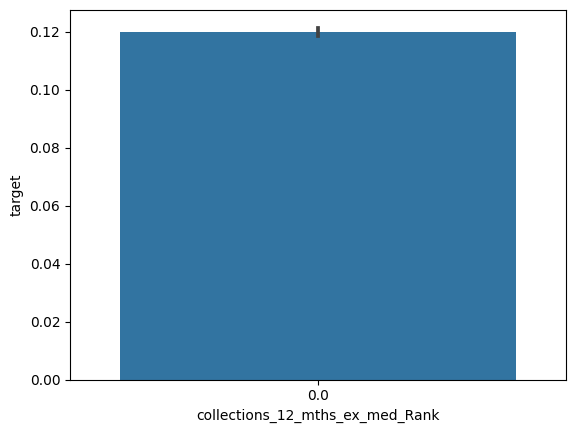

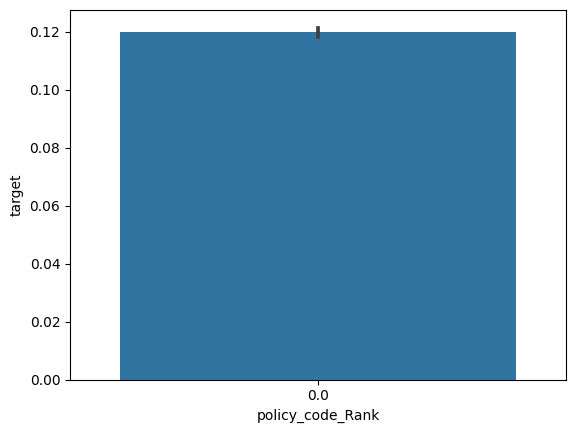

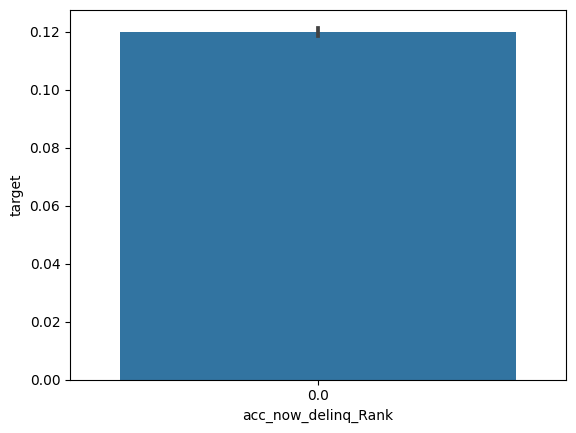

In [64]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()